# **Olympics Data Analysis(1896-2022)**
### By *Vishal Rathour* vishdsc@gmail.com
### 

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import re

# *Olympic Host Data Analysis*

In [2]:
# read the file
host_df = pd.read_csv('olympic_hosts.csv')

In [3]:
host_df.shape

(53, 7)

In [4]:
host_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_slug        53 non-null     object
 1   game_end_date    53 non-null     object
 2   game_start_date  53 non-null     object
 3   game_location    53 non-null     object
 4   game_name        53 non-null     object
 5   game_season      53 non-null     object
 6   game_year        53 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


In [5]:
host_df.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


### Host Countries Information

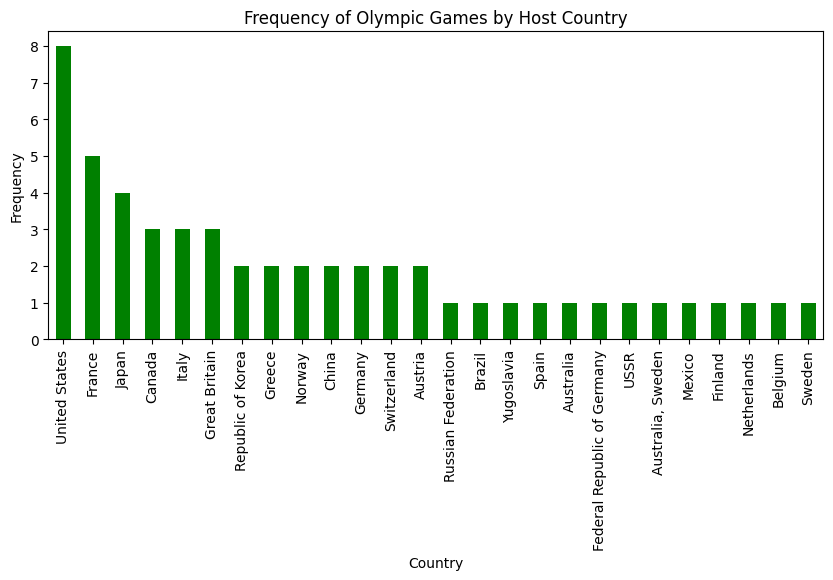

In [6]:
plt.figure(figsize=(10,4))
host_df['game_location'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title("Frequency of Olympic Games by Host Country")
plt.show()

### Olympics by Season

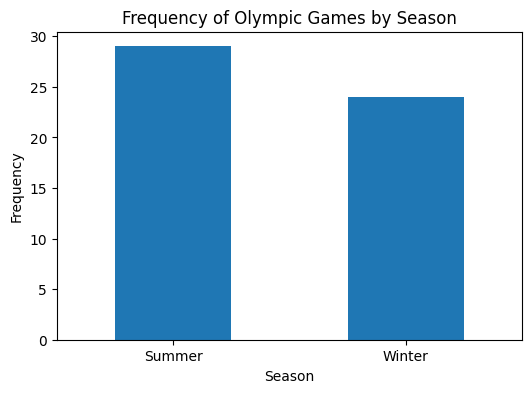

In [7]:
plt.figure(figsize=(6,4))
host_df['game_season'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.title("Frequency of Olympic Games by Season")
plt.show()

### First Olympics details

In [8]:
host_df[host_df['game_year']==host_df['game_year'].min()]

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
52,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896


### Olympics game duration

In [9]:
# change the datatypes of columns
host_df['game_end_date'] = pd.to_datetime(host_df['game_end_date'])
host_df['game_start_date'] = pd.to_datetime(host_df['game_start_date'])
host_df['game_end_date'].dtype

datetime64[ns, UTC]

In [10]:
host_df['game_duration']=host_df['game_end_date'] - host_df['game_start_date']

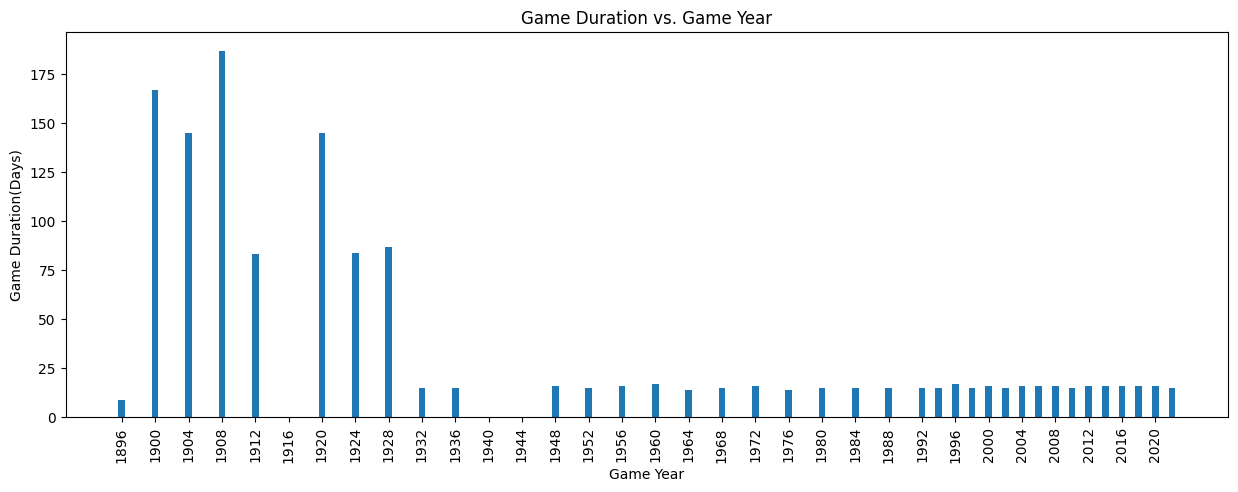

In [11]:
plt.figure(figsize=(15,5))
plt.bar(host_df['game_year'], host_df['game_duration'].dt.days)
plt.xticks(rotation='vertical')
plt.xticks(range(1896,2023,4))
plt.title('Game Duration vs. Game Year')
plt.xlabel('Game Year')
plt.ylabel('Game Duration(Days)')
plt.show()

In [12]:
print('Shortest Olympic Duration:', host_df['game_duration'].min().days, 'days')

Shortest Olympic Duration: 8 days


In [13]:
print('Longest Olympic Duration:', host_df['game_duration'].max().days, 'days')

Longest Olympic Duration: 187 days


# Olympic Athelete Data Analysis

In [14]:
ath_df = pd.read_csv('olympic_athletes.csv')

In [15]:
ath_df.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


In [16]:
ath_df.sample()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
11408,https://olympics.com/en/athletes/mark-kyle,Mark KYLE,3,Athens 2004,1973.0,NaN,NaN


In [17]:
ath_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75904 entries, 0 to 75903
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   athlete_url           75904 non-null  object 
 1   athlete_full_name     75904 non-null  object 
 2   games_participations  75904 non-null  int64  
 3   first_game            75882 non-null  object 
 4   athlete_year_birth    73448 non-null  float64
 5   athlete_medals        15352 non-null  object 
 6   bio                   22842 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.1+ MB


### Top 5 Participants in games

In [18]:
ath_df.sort_values(by='games_participations', ascending=False).head()[['athlete_full_name','games_participations']]

,athlete_full_name,games_participations
13932,Ian MILLAR,10
14975,Afanasijs KUZMINS,9
52073,Hubert RAUDASCHL,9
2167,Nino SALUKVADZE,9
56229,Paul Elvstrøm,8


In [19]:
# Extract the year and country
ath_df['first_game_year'] = ath_df['first_game'].str.extract(r'(\d{4})')
ath_df['first_game_country'] = ath_df['first_game'].str.extract(r'([A-Za-z\s]+)')
ath_df['first_game_country'] =ath_df['first_game_country'].str.strip()

ath_df['athlete_medals'] = ath_df['athlete_medals'].str.replace(r'[\n\t\r]', '', regex=True).str.strip()

In [20]:
del ath_df['athlete_url']
del ath_df['bio']
del ath_df['first_game']

In [297]:
ath_df.head()

,athlete_full_name,games_participations,athlete_year_birth,athlete_medals,first_game_year,first_game_country
0,Cooper WOODS-TOPALOVIC,1,2000.0,NaN,2022,Beijing
1,Felix ELOFSSON,2,1995.0,NaN,2018,PyeongChang
2,Dylan WALCZYK,1,1993.0,NaN,2022,Beijing
3,Olli PENTTALA,1,1995.0,NaN,2022,Beijing
4,Dmitriy REIKHERD,1,1989.0,NaN,2022,Beijing


In [298]:
ath_df.sample(5)

,athlete_full_name,games_participations,athlete_year_birth,athlete_medals,first_game_year,first_game_country
16863,Rasul ABDURAIM,2,1988.0,NaN,2008,Beijing
54571,Janice SMITH,1,1945.0,NaN,1964,Innsbruck
14351,Rachel SEAMAN,1,1986.0,NaN,2012,London
43135,Hana PASIAROVA,2,1949.0,NaN,1976,Innsbruck
28383,Andrea PRONO SANCHEZ,1,1984.0,NaN,2000,Sydney


In [299]:
ath_df['athlete_medals'].unique()

array([nan, '1S', '1B', '1G2S', '1G', '1G1B', '2G1S', '1S1B', '2S1B',
       '2B', '1G1S1B', '1G1S', '1S3B', '2G4S5B', '3G2S', '2G2B', '2G2S1B',
       '4G1S1B', '2G', '1S2B', '2G1B', '3B', '2S', '3G', '1G2S1B', '1G2B',
       '4G', '3G1B', '6G1B', '3G2S1B', '2G3S', '5G2S1B', '3G2B', '2G3S3B',
       '1G2S2B', '1G3B', '3G1S1B', '5G1S1B', '4B', '1G3S1B', '3S1B',
       '2S3B', '3G6S', '2G1S1B', '2G4S1B', '6G5S2B', '5G2S2B', '4G2S3B',
       '3G2S2B', '2G3S1B', '4G2S', '2S2B', '3S2B', '2G2S', '5G1B',
       '6G1S1B', '1G1S2B', '5G', '2S4B', '7G2S', '4G1S2B', '3G3B',
       '1G4S2B', '3G1S', '7G5S', '3G1S2B', '1G3S', '1G1S4B', '7G3S1B',
       '5G1S', '1G1S3B', '3G4S1B', '7G3S', '4G1S3B', '5G2S4B', '3G3S1B',
       '7G', '1G5S', '1G2S4B', '4S2B', '2G3B', '5G2S', '4G3S1B', '3G3S',
       '3S', '8G4S3B', '2G1S2B', '4G2B', '2G1S3B', '4S', '8G', '3G4S',
       '2G2S3B', '23G3S2B', '6G3S3B', '5G1S2B', '4G1S', '8G4S1B',
       '1G3S2B', '6G2B', '3G5S1B', '4G3S3B', '4G1B', '1G4S', '6G1S2B',
    

In [300]:
# Define a function to extract counts of Gold, Silver, Bronze
def extract_medals(medals_str):
    if pd.isna(medals_str):  # Check if the value is NaN
        return pd.Series([0, 0, 0], index=['G', 'S', 'B'])
    
    # Ensure the input is a string
    medals_str = str(medals_str)
    
    g_count = int(re.search(r'(\d+)G', medals_str).group(1)) if 'G' in medals_str else 0
    s_count = int(re.search(r'(\d+)S', medals_str).group(1)) if 'S' in medals_str else 0
    b_count = int(re.search(r'(\d+)B', medals_str).group(1)) if 'B' in medals_str else 0
    return pd.Series([g_count, s_count, b_count], index=['G', 'S', 'B'])

# Apply the function to the DataFrame and create new columns
ath_df[['Gold', 'Silver', 'Bronze']] = ath_df['athlete_medals'].apply(extract_medals)

In [301]:
# Total medals of athlete
ath_df['athlete_medals'] = ath_df['Gold'] + ath_df['Silver'] + ath_df['Bronze']

### Athlete with highest number of Medals

In [304]:
ath_df[ath_df['athlete_medals']==ath_df['athlete_medals'].max()][['athlete_full_name','games_participations','athlete_medals','Gold','Silver','Bronze']]

,athlete_full_name,games_participations,athlete_medals,Gold,Silver,Bronze
11547,Michael PHELPS,5,28,23,3,2


### Athlete with highest number of Gold medals

In [305]:
ath_df[ath_df['Gold']==ath_df['Gold'].max()][['athlete_full_name','games_participations','athlete_medals','Gold','Silver','Bronze']]

,athlete_full_name,games_participations,athlete_medals,Gold,Silver,Bronze
11547,Michael PHELPS,5,28,23,3,2


### Athlete with highest number of Silver medals

In [306]:
ath_df[ath_df['Silver']==ath_df['Silver'].max()][['athlete_full_name','games_participations','athlete_medals','Gold','Silver','Bronze']]

,athlete_full_name,games_participations,athlete_medals,Gold,Silver,Bronze
1569,Charlotte KALLA,4,9,3,6,0
43655,Aleksandr DITYATIN,2,10,3,6,1
46115,Shirley Farber BABASHOFF,2,9,3,6,0
47853,Mikhail VORONIN,2,9,2,6,1


### Athlete with highest number of Bronze medals

In [307]:
ath_df[ath_df['Bronze']==ath_df['Bronze'].max()][['athlete_full_name','games_participations','athlete_medals','Gold','Silver','Bronze']]

,athlete_full_name,games_participations,athlete_medals,Gold,Silver,Bronze
23356,Franziska VAN ALMSICK,4,10,0,4,6
24282,Alexei NEMOV,3,12,4,2,6
27593,Merlene OTTEY-PAGE,7,9,0,3,6
28894,Harri KIRVESNIEMI,6,6,0,0,6
59392,Heikki SAVOLAINEN,5,9,2,1,6


### New athletes entry in Olympics

In [309]:
ath_df['first_game_year'].value_counts().head()

first_game_year
1992    4845
1988    4379
2016    4111
2008    3934
2012    3906
Name: count, dtype: int64

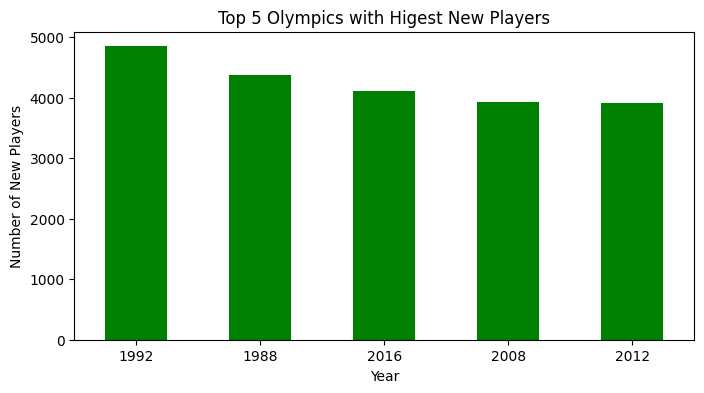

In [310]:
plt.figure(figsize=(8,4))
ath_df['first_game_year'].value_counts().head().plot(kind='bar', color='green')
plt.xticks(rotation = 0)
plt.title('Top 5 Olympics with Higest New Players')
plt.xlabel('Year')
plt.ylabel('Number of New Players')
plt.show()

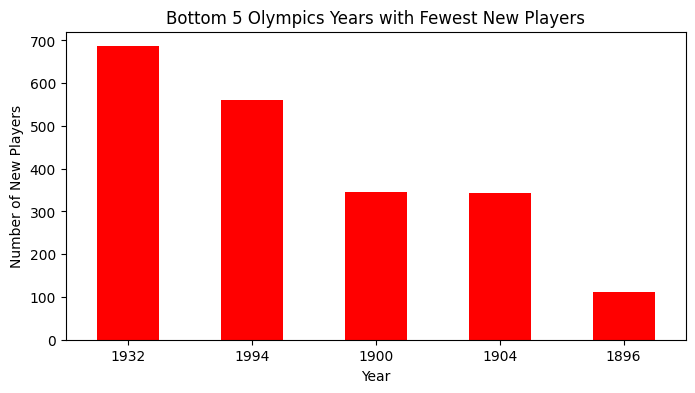

In [311]:
plt.figure(figsize=(8,4))
ath_df['first_game_year'].value_counts().tail().plot(kind='bar', color='red')
plt.xticks(rotation = 0)
plt.title('Bottom 5 Olympics Years with Fewest New Players')
plt.xlabel('Year')
plt.ylabel('Number of New Players')
plt.show()

# Olympics Medal Analysis

In [ ]:
med_df = pd.read_csv('olympic_medals.csv')

In [335]:
med_df.sample(5)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
10232,Cycling Track,barcelona-1992,Points Race men,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/cedric-mathy,Cedric MATHY,Belgium,BE,BEL
20193,Wrestling,antwerp-1920,"Heavyweight, Greco-Roman (>82.5 kilograms) Men",Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/adolf-valenti...,Adolf Valentin LINDFORS,Finland,FI,FIN
921,Artistic Gymnastics,tokyo-2020,Women's Team,Women,BRONZE,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR
20866,Athletics,london-1908,javelin throw men,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/otto-nilsson,Otto NILSSON,Sweden,SE,SWE
11685,Swimming,los-angeles-1984,100m butterfly men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/pablo-morales,Pablo MORALES,United States of America,US,USA


In [336]:
med_df['country_3_letter_code'].value_counts()

country_3_letter_code
USA    3094
URS    1272
GER    1167
GBR    1045
FRA     952
       ... 
DJI       1
AHO       1
ISV       1
IRQ       1
GUY       1
Name: count, Length: 154, dtype: int64

In [337]:
med_df['medal_type'].value_counts()

medal_type
BRONZE    7529
GOLD      7109
SILVER    7059
Name: count, dtype: int64

In [338]:
gold_medals = med_df[med_df['medal_type'] == 'GOLD']
silver_medals = med_df[med_df['medal_type'] == 'SILVER']
bronze_medals = med_df[med_df['medal_type'] == 'BRONZE']

In [339]:
gold_counts = gold_medals['country_3_letter_code'].value_counts()
silver_counts = silver_medals['country_3_letter_code'].value_counts()
bronze_counts = bronze_medals['country_3_letter_code'].value_counts()

In [340]:
top_country = gold_counts.idxmax()
top_gold_count = gold_counts.max()

print(f"The country with the highest number of gold medals is {top_country} with {top_gold_count} gold medals.")

The country with the highest number of gold medals is USA with 1222 gold medals.


In [344]:
bottom_country = gold_counts.idxmin()
bottom_gold_count = gold_counts.min()

print(f"The country with the lowest number of gold medals is {bottom_country} with {bottom_gold_count} gold medals.")

The country with the lowest number of gold medals is BER with 1 gold medals.


In [342]:
top_country = silver_counts.idxmax()
top_silver_count = silver_counts.max()

print(f"The country with the highest number of silver medals is {top_country} with {top_silver_count} silver medals.")

The country with the highest number of silver medals is USA with 1000 silver medals.


In [345]:
bottom_country = silver_counts.idxmin()
bottom_silver_count = silver_counts.min()

print(f"The country with the lowest number of silver medals is {bottom_country} with {bottom_silver_count} silver medals.")

The country with the lowest number of silver medals is JOR with 1 silver medals.


In [343]:
top_country = bronze_counts.idxmax()
top_bronze_count = bronze_counts.max()

print(f"The country with the highest number of bronze medals is {top_country} with {top_bronze_count} bronze medals.")

The country with the highest number of bronze medals is USA with 872 bronze medals.


In [346]:
bottom_country = bronze_counts.idxmin()
bottom_bronze_count = bronze_counts.min()

print(f"The country with the lowest number of bronze medals is {bottom_country} with {bottom_bronze_count} silver medals.")

The country with the lowest number of bronze medals is BUR with 1 silver medals.
